In [1]:
# import libraries

import pandas as pd
import seaborn as sns

In [2]:
mall=pd.read_csv("data/Mall_Customers.csv")
retail= pd.read_csv("data/Online_Retail.csv")

In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# shape of dataset
data_cols= mall.info()
print(f'The dataset has {mall.shape[1]} columns and {mall.shape[0]} rows')
print(data_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
The dataset has 5 columns and 200 rows
None


In [5]:
# shape of dataset
datas_cols= retail.info()
print(f'The dataset has {retail.shape[1]} columns and {retail.shape[0]} rows')
print(datas_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
The dataset has 8 columns and 541909 rows
None


In [6]:
# unique values per columns
print(f"unique values in Mall dataframe \n {mall.nunique()}n")
print(f"unique values in Retail dataframe \n {retail.nunique()}")

unique values in Mall dataframe 
 CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64n
unique values in Retail dataframe 
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [7]:
df_count_desc= retail["Description"].value_counts().sort_values(ascending=False)
df_top_country=retail["Country"].value_counts().sort_values(ascending=False)

print(df_top_country.head(10))
print(df_count_desc.head(10))

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64


In [8]:
categorical_columns=retail.select_dtypes(include=["object","category"]).columns
for col in categorical_columns:
    print(f"Top values for {col}:")
    print(retail[col].value_counts().head(10))

Top values for InvoiceNo:
InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: count, dtype: int64
Top values for StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64
Top values for Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64
Top values for InvoiceDate:
InvoiceDate
2011-10-31 14:41:00    1114
2011-12-08 0

In [9]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
numeric_cols= retail.select_dtypes(include='number').describe()

numeric_cols

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# summary statistics
mall_numeric_cols= mall.select_dtypes(include='number').describe()
mall_numeric_cols

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# categorize ages into 'Young', 'Adult','Senior'
bins= [0, 20, 60, 70]
labels = ['Young', 'Adult','Senior']

mall["Age_Category"]= pd.cut(mall["Age"], bins=bins, labels=labels, right= False)

In [14]:
mall["Age_Category"].value_counts()

Age_Category
Adult     168
Senior     18
Young      12
Name: count, dtype: int64

In [15]:
# categirize Annual income into 'Low income', 'Middle Income', 'High Income'
labels = ['Low income', 'Middle Income', 'High Income']
mall["income_category"]= pd.cut(mall["Annual Income (k$)"], bins=3, labels=labels )

mall["income_category"].value_counts()

income_category
Middle Income    94
Low income       86
High Income      20
Name: count, dtype: int64

In [16]:
mall[mall["income_category"] == "High Income"].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Category,income_category
180,181,Female,37,97,32,Adult,High Income
181,182,Female,32,97,86,Adult,High Income
182,183,Male,46,98,15,Adult,High Income
183,184,Female,29,98,88,Adult,High Income
184,185,Female,41,99,39,Adult,High Income


# check for unrealistic values
numeric_cols= retail.select_dtypes(include='number').columns
for col in numeric_cols:
    if retail[col] < 0:
        print(col)

In [17]:
counts=(retail[numeric_cols] <= 0).sum()
counts

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
# [mall] unique customers and most common category

print(mall["CustomerID"].nunique())
print(mall["Age_Category"].mode()[0])
print(mall["income_category"].mode()[0])

200
Adult
Middle Income


In [19]:
# [retail] unique customers
print(retail["CustomerID"].nunique())



4372


In [20]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data cleaning & Filtering

In [21]:
# retail["Description"]= retail["Description"].dropna(inplace=True)

In [22]:
retail.dropna(subset=["Description"], inplace=True)

In [23]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


In [24]:
#  count of rows with duplicates
retail.duplicated().sum()

5268

In [25]:
#  drop duplicate values
retail.drop_duplicates(inplace=True)

In [26]:
# records where Age is 18
mall[mall["Age"] == 18 ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Category,income_category
33,34,Male,18,33,92,Young,Low income
65,66,Male,18,48,59,Young,Low income
91,92,Male,18,59,41,Young,Middle Income
114,115,Female,18,65,48,Young,Middle Income


In [27]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    535187 non-null  object 
 1   StockCode    535187 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     535187 non-null  int64  
 4   InvoiceDate  535187 non-null  object 
 5   UnitPrice    535187 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      535187 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.7+ MB


In [28]:
retail["Quantity"].describe()

count    535187.000000
mean          9.671593
std         219.059056
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [29]:
retail["Quantity"]= retail["Quantity"].abs()

In [30]:
retail["UnitPrice"]= retail["UnitPrice"].abs()

In [31]:
?retail.abs()

Object `retail.abs()` not found.


<Axes: xlabel='UnitPrice'>

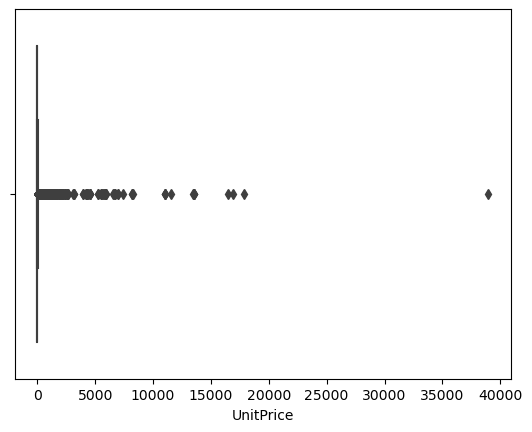

In [32]:
import matplotlib.pyplot as plt
sns.boxplot(data=retail, x="UnitPrice")

In [33]:
# categorize the [unitprice] to low, medium, high, very high

def categorize_price(price):
    if price < 5000:
        return "Low"
    elif price < 15000:
        return "Medium"
    else:
        return "High"
    
retail["Price_category"]= retail["UnitPrice"].apply(categorize_price)

In [34]:
retail["Price_category"].value_counts()

Price_category
Low       535154
Medium        29
High           4
Name: count, dtype: int64

In [35]:
# bucket spending into quartiles

mall["Spending Quartiles"]= pd.qcut(mall['Spending Score (1-100)'], q=4, labels=[ 'Low', 'Medium', 'High', 'Very High'])

In [36]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Category,income_category,Spending Quartiles
0,1,Male,19,15,39,Young,Low income,Medium
1,2,Male,21,15,81,Adult,Low income,Very High
2,3,Female,20,16,6,Adult,Low income,Low
3,4,Female,23,16,77,Adult,Low income,Very High
4,5,Female,31,17,40,Adult,Low income,Medium


In [37]:
# drop [CustomerID]
mall.drop(columns= 'CustomerID', inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
numeric_cols= mall.select_dtypes(include='number').columns

scaled_data = scaler.fit_transform(mall[numeric_cols])
df_scaled = pd.DataFrame(scaled_data, columns = [numeric_cols])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Aggregation and Feature Engineering

In [39]:
#  average income by gender
ave_income = mall.groupby('Genre')['Annual Income (k$)'].mean().round(2)

ave_income

Genre
Female    59.25
Male      62.23
Name: Annual Income (k$), dtype: float64

In [40]:
# max,min, mean for numeric columns per group
desc_groups = mall.groupby('Genre')[numeric_cols].agg(['max', 'min', 'mean'])

desc_groups


Age                Annual Income (k$)                 \
       max min       mean                max min       mean   
Genre                                                         
Female  68  18  38.098214                126  16  59.250000   
Male    70  18  39.806818                137  15  62.227273   

       Spending Score (1-100)                 
                          max min       mean  
Genre                                         
Female                     99   5  51.526786  
Male                       97   1  48.511364

In [41]:
#  ratio feature ["income_to_age"]

mall["income_to_age"]= mall["Annual Income (k$)"]/mall["Age"]

mall[["Annual Income (k$)", "Age","income_to_age"]].head()

,Annual Income (k$),Age,income_to_age
0,15,19,0.789474
1,15,21,0.714286
2,16,20,0.800000
3,16,23,0.695652
4,17,31,0.548387


In [42]:
# “High value” customers based on income and spending greater than average
mean_income= mall['Annual Income (k$)'].mean()
mean_spending = mall['Spending Score (1-100)'].mean()
mall['High Value'] = (mall['Annual Income (k$)']> mean_income) & (mall['Spending Score (1-100)']>mean_spending)

mall[["Annual Income (k$)", 'High Value',"income_to_age"]].head()

,Annual Income (k$),High Value,income_to_age
0,15,False,0.789474
1,15,False,0.714286
2,16,False,0.800000
3,16,False,0.695652
4,17,False,0.548387


In [43]:
# correlation between numeric features
mall[numeric_cols].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [44]:
mall[["income_to_age", "Age","Annual Income (k$)", "Spending Score (1-100)"]].corr()

,income_to_age,Age,Annual Income (k$),Spending Score (1-100)
income_to_age,1.000000,-0.564576,0.769858,0.152598
Age,-0.564576,1.000000,-0.012398,-0.327227
Annual Income (k$),0.769858,-0.012398,1.000000,0.009903
Spending Score (1-100),0.152598,-0.327227,0.009903,1.000000


In [45]:
# gender with high average spending score 
high_spend_gender= mall.groupby("Genre")["Spending Score (1-100)"].mean().round(2)

print(f"The gender with the highest average spend score is the {high_spend_gender.idxmax()} with a an average {high_spend_gender.max()}")

The gender with the highest average spend score is the Female with a an average 51.53


In [46]:
# pivot table

spend_pivot_table= mall.pivot_table(values='Spending Score (1-100)', index= 'Age_Category', columns= 'Genre', aggfunc='mean')

print(spend_pivot_table)

Genre            Female       Male
Age_Category                      
Young         50.666667  45.111111
Adult         51.792079  50.611940
Senior        48.500000  36.100000


### Visualizations & Group Exploration

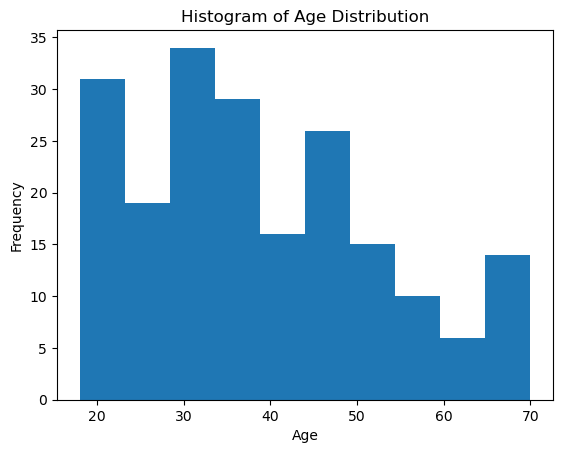

In [47]:
# plot hist
plt.hist(mall["Age"], bins=10)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution")
plt.show()

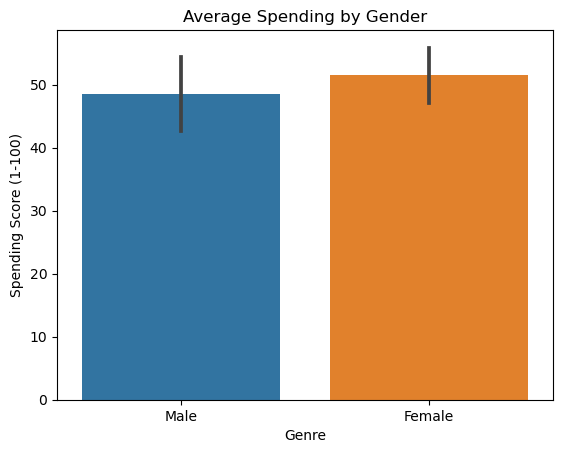

In [48]:
# plot barchart
import seaborn as sns
sns.barplot(data=mall, x='Genre', y='Spending Score (1-100)')

plt.title("Average Spending by Gender")
plt.show()

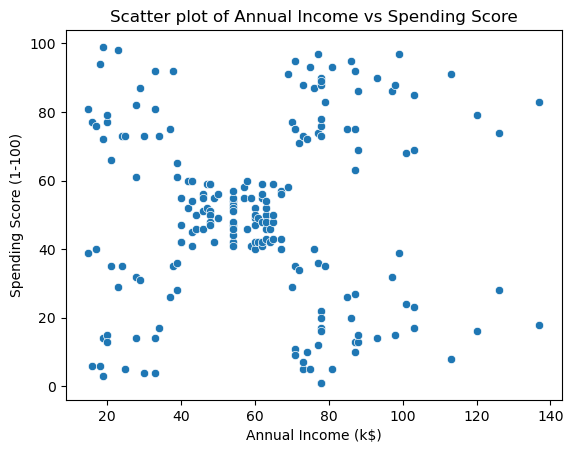

In [49]:
# plot scatter plot

sns.scatterplot(data=mall, x='Annual Income (k$)', y= 'Spending Score (1-100)')

plt.title( "Scatter plot of Annual Income vs Spending Score")

plt.show()

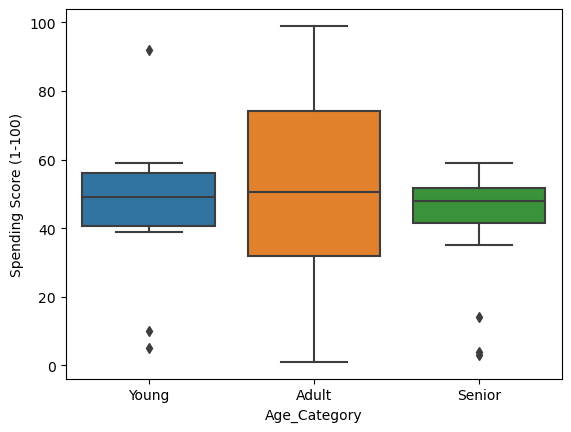

In [50]:
# plot boxplot
sns.boxplot(data=mall, y='Spending Score (1-100)', x= 'Age_Category')

plt.show()

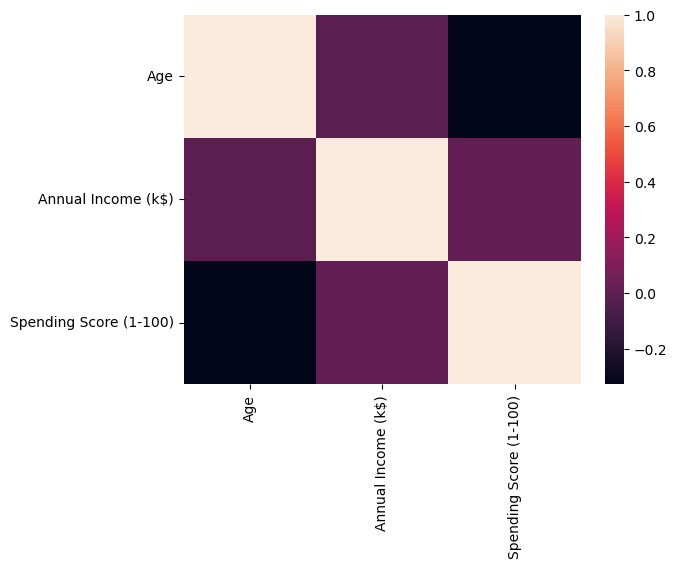

In [51]:
# plot heatmap
sns.heatmap(mall[numeric_cols].corr())

plt.show()

### Dimensionality Reduction

In [52]:
from sklearn.decomposition import PCA

subset = mall[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(subset)


In [53]:
#Putting PCA results into a DataFrame with Department
pca_df = pd.DataFrame(x_scaled,columns=["PC1", "PC2"])
pca_df["Genre"] = mall["Genre"].values

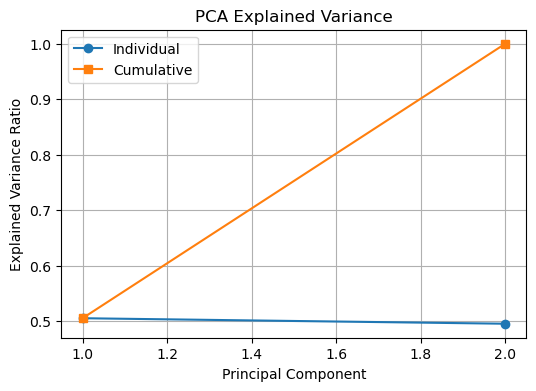

In [57]:
# pca
pca=PCA()
pca_scaled=pca.fit_transform(x_scaled)
explain_var= pca.explained_variance_ratio_
explain_var

# plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explain_var) + 1), explain_var, marker='o', label="Individual")
plt.plot(range(1, len(explain_var) + 1), explain_var.cumsum(), marker='s', label="Cumulative")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
pca_df = pd.DataFrame(x_scaled,columns=["PCA1","PCA2"])
pca_df.head()

,PCA1,PCA2
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [58]:
plt.figure(figsize=(10,7))
for genre in pca_df["Genre"].unique():
    subset = pca_df[pca_df["Genre"] == genre ]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=genre,
        alpha=0.7)


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Customers by Gender")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'Genre'

<Figure size 1000x700 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

# Plot
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

### Clustering & Evaluation 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

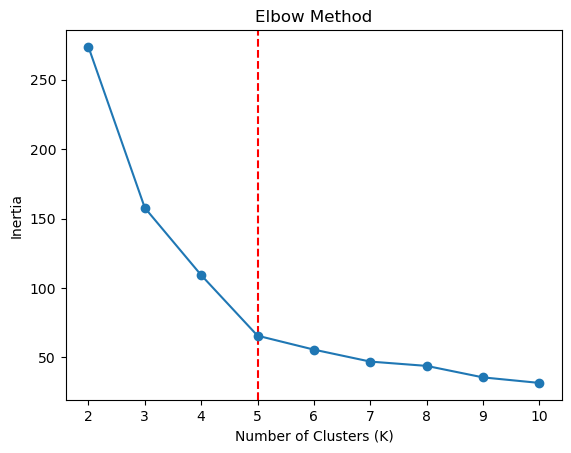

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k)
    model.fit(pca_scaled)
    inertias.append(model.inertia_)

plt.axvline(x=5, color='r', linestyle='--')
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

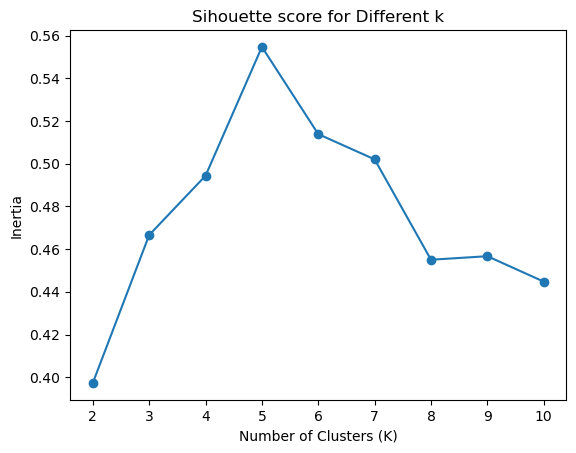

In [72]:
# compute silhoutte score for each k 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores= []
k_range= range(2,11)

for k in k_range:
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_scaled)
    score=silhouette_score(pca_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Sihouette score for Different k")
plt.show()


In [74]:
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(best_k)

5


In [77]:
k_means= KMeans(n_clusters=5, random_state=42)
k_means_best_k=kmeans.fit(pca_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [80]:
optimal_k = 5  # You can change this based on the elbow/silhouette
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters= kmeans.fit_predict(pca_scaled)
mall['Cluster'] =clusters

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


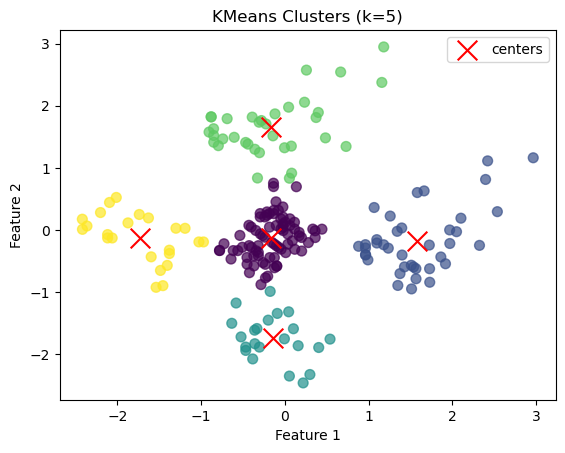

In [84]:
#Scatter plot
centres = kmeans.cluster_centers_
labels=kmeans.fit_predict(pca_scaled)

plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centres[:,0], centres[:,1], c='red', s=200, marker='x', label='centers')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KMeans Clusters (k={optimal_k})")
plt.legend()
plt.show()

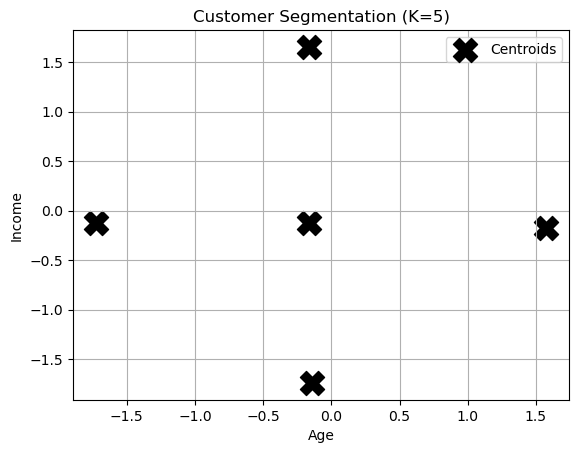

In [82]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label='Centroids', marker='X')

plt.xlabel("Age")
plt.ylabel("Income")
plt.title(f"Customer Segmentation (K={optimal_k})")
plt.legend()
plt.grid(True)
plt.show()


In [95]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

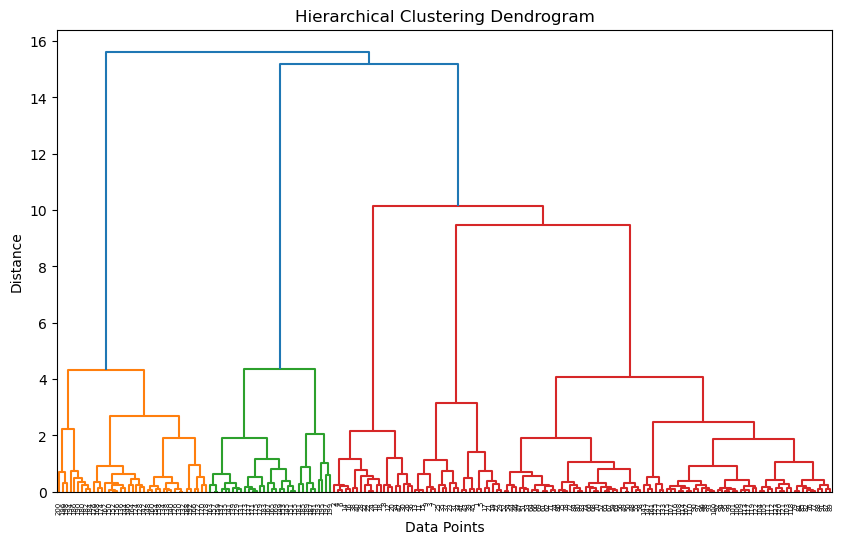

In [88]:
# Linkage matrix
linked = linkage(pca_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=range(1, len(pca_scaled)+1),
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

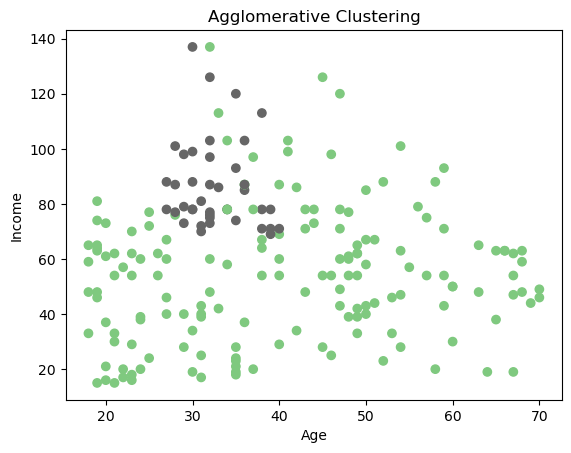

In [97]:
model = AgglomerativeClustering(linkage='ward')
mall['Cluster'] = model.fit_predict(pca_scaled)

# Visualize
plt.scatter(mall['Age'], mall['Annual Income (k$)'], c=mall['Cluster'], cmap='Accent')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Agglomerative Clustering')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Hierarchical  KMeans
0             4       4
1             3       2
2             4       4
3             3       2
4             4       4
5             3       2
6             4       4
7             3       2
8             4       4
9             3       2


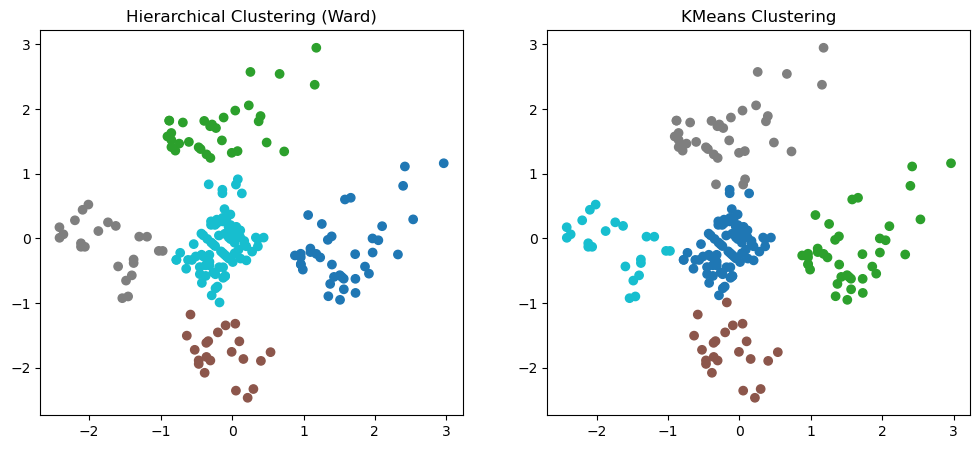

In [99]:
#Cut dendrogram at k clusters
k = 5
hc_clusters = fcluster(linked, k, criterion='maxclust')

#Run KMeans with same k
kmeans = KMeans(n_clusters=k, random_state=42)
km_clusters = kmeans.fit_predict(pca_scaled)

#Compare results
comparison_df = pd.DataFrame({
    "Hierarchical": hc_clusters,
    "KMeans": km_clusters
})

print(comparison_df.head(10))  # check first 10 assignments

# Plot side-by-side scatter for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hierarchical clusters
axes[0].scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=hc_clusters, cmap="tab10")
axes[0].set_title("Hierarchical Clustering (Ward)")

# KMeans clusters
axes[1].scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=km_clusters, cmap="tab10")
axes[1].set_title("KMeans Clustering")

plt.show()

In [101]:
cluster_avg= mall.groupby("Cluster")[["Age", "Spending Score (1-100)","Annual Income (k$)"]].mean().round(2)

cluster_avg

,Age,Spending Score (1-100),Annual Income (k$)
Cluster,,,
0,40.341615,42.465839,54.267081
1,32.692308,82.128205,86.538462


In [102]:
cluster_size= mall['Cluster'].value_counts(sort='Ascending')

cluster_size

Cluster
0    161
1     39
Name: count, dtype: int64

In [108]:
states=[0,30,42,70,10]
for state in states:
    kmeans=KMeans(n_clusters=6,random_state=state)
    clusters=kmeans.fit_predict(pca_scaled)
    score=silhouette_score(pca_scaled,clusters)
    print(f"Random state {state}, Clusters= {np.bincount(clusters)} and Silhouette score of {score:.2f}")

Random state 0, Clusters= [49 39 32 21 39 20] and Silhouette score of 0.46
Random state 30, Clusters= [32 47 39 21 40 21] and Silhouette score of 0.46
Random state 42, Clusters= [77 39 22 35 12 15] and Silhouette score of 0.51
Random state 70, Clusters= [11 81 35 23 22 28] and Silhouette score of 0.54
Random state 10, Clusters= [35 81 23 22  7 32] and Silhouette score of 0.54


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [103]:
from sklearn.cluster import KMeans

# Try different random states
states = [0, 30, 42, 70, 10]

for state in states:
    kmeans = KMeans(n_clusters=6, random_state=state)
    clusters = kmeans.fit_predict(pca_scaled)
    
    print(f"Random state {state}, Cluster sizes:\n{pd.Series(clusters).value_counts().sort_index()}\n")


Random state 0, Cluster sizes:
0    49
1    39
2    32
3    21
4    39
5    20
Name: count, dtype: int64

Random state 30, Cluster sizes:
0    32
1    47
2    39
3    21
4    40
5    21
Name: count, dtype: int64

Random state 42, Cluster sizes:
0    77
1    39
2    22
3    35
4    12
5    15
Name: count, dtype: int64

Random state 70, Cluster sizes:
0    11
1    81
2    35
3    23
4    22
5    28
Name: count, dtype: int64

Random state 10, Cluster sizes:
0    35
1    81
2    23
3    22
4     7
5    32
Name: count, dtype: int64



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [111]:
mall.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Category,income_category,Spending Quartiles,income_to_age,High Value,Cluster
0,Male,19,15,39,Young,Low income,Medium,0.789474,False,0
1,Male,21,15,81,Adult,Low income,Very High,0.714286,False,0
2,Female,20,16,6,Adult,Low income,Low,0.800000,False,0
3,Female,23,16,77,Adult,Low income,Very High,0.695652,False,0
4,Female,31,17,40,Adult,Low income,Medium,0.548387,False,0


In [ ]:
# save data with cluster to csv
mall.to_csv("mall_cluster.csv", index=False)